# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# 2. Data

In [9]:
# read excel
polarization_data = pd.read_excel('final_results_comparison.xlsx')
polarization_data

,Unnamed: 0,id_new,split_speeches,BERT,GPT,mismatch
0,0,20_1_1066957_1,Sehr geehrter Herr Alterspräsident! So muss ic...,0,0,False
1,1,20_1_1066959_1,Nicht lange; da haben Sie schon recht. – Liebe...,0,0,False
2,2,20_1_1066959_2,Sie ist nicht in Stein gemeißelt – das wissen ...,0,0,False
3,3,20_1_1066959_3,Wir begrüßen auch ausdrücklich die Initiative ...,0,0,False
4,4,20_1_1066959_4,"Wir plädieren allerdings auch dafür, dass wir ...",0,0,False
...,...,...,...,...,...,...
150657,150657,20_187_1075926_1,Sehr geehrte Frau Präsidentin! Kolleginnen und...,1,1,False
150658,150658,20_187_1075926_2,Doch es ist etwas diffiziler und etwas differe...,0,0,False
150659,150659,20_187_1075926_3,"Viele von ihnen haben Dinge erlebt, die wir un...",0,0,False
150660,150660,20_187_1075926_4,Jeder Mensch hat ein Recht auf Schutz und auf ...,1,1,False


In [37]:
# read csv
features = pd.read_csv('content_df_features.csv', index_col=0)
features

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure
0,0,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.000000
1,1,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.000000
2,2,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.000000
3,3,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.000000
4,4,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,11004891,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Sehr geehrte Frau Präsidentin! Meine Damen und...,2024-09-25,AfD,2024,1799,57.0,männlich,6.594521
966042,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Herr Abgeordneter.,2024-09-25,DIE LINKE.,2024,18,61.0,weiblich,25.887671
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,11004891,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Vielen Dank.,2024-09-25,Fraktionslos,2024,12,57.0,männlich,6.594521
966044,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Für die SPD-Fraktion hat die Kollegin Angelika...,2024-09-25,DIE LINKE.,2024,65,61.0,weiblich,25.887671


# 3. Data prep

In [10]:
polarization_data= polarization_data.drop(columns = ["Unnamed: 0"])
polarization_data = polarization_data[polarization_data["mismatch"] == False]
polarization_data

,id_new,split_speeches,BERT,GPT,mismatch
0,20_1_1066957_1,Sehr geehrter Herr Alterspräsident! So muss ic...,0,0,False
1,20_1_1066959_1,Nicht lange; da haben Sie schon recht. – Liebe...,0,0,False
2,20_1_1066959_2,Sie ist nicht in Stein gemeißelt – das wissen ...,0,0,False
3,20_1_1066959_3,Wir begrüßen auch ausdrücklich die Initiative ...,0,0,False
4,20_1_1066959_4,"Wir plädieren allerdings auch dafür, dass wir ...",0,0,False
...,...,...,...,...,...
150657,20_187_1075926_1,Sehr geehrte Frau Präsidentin! Kolleginnen und...,1,1,False
150658,20_187_1075926_2,Doch es ist etwas diffiziler und etwas differe...,0,0,False
150659,20_187_1075926_3,"Viele von ihnen haben Dinge erlebt, die wir un...",0,0,False
150660,20_187_1075926_4,Jeder Mensch hat ein Recht auf Schutz und auf ...,1,1,False


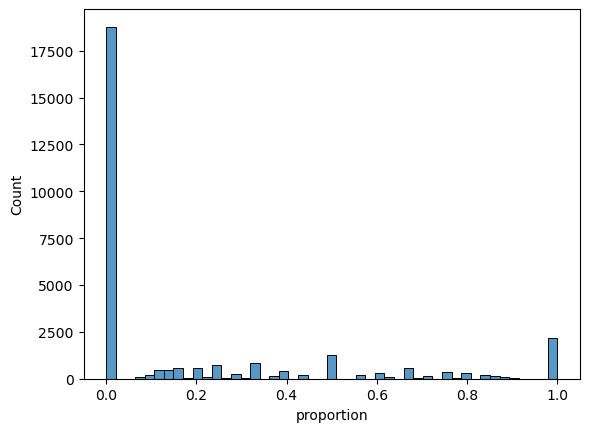

In [34]:
# remove last part of unique id
polarization_data["speech_id"] = polarization_data["id_new"].str.rsplit("_").str[2]
polarization_data["polarizing_amount"] = (polarization_data["BERT"]==1)& (polarization_data["GPT"]==1)
polarization_data

# group by speech_id, count polarizing speeches
polarization_data_grouped = polarization_data.groupby("speech_id").agg({"polarizing_amount":"sum", "id_new":"count"}).reset_index()
polarization_data_grouped['proportion'] = polarization_data_grouped['polarizing_amount']/polarization_data_grouped['id_new']
polarization_data_grouped

# show distibution of polarizing speeches
sns.histplot(polarization_data_grouped['proportion'])
plt.show()

In [35]:
# show proportion of 0
polarization_data_grouped[polarization_data_grouped['proportion']<0.5].shape[0]/polarization_data_grouped.shape[0]

0.8022536529909385

In [36]:
polarization_data_grouped['polarizing']=polarization_data_grouped['proportion']>0.5

,speech_id,polarizing_amount,id_new,proportion,polarizing
3858,1071221,0,1,0.000000,False
542,1065026,0,6,0.000000,False
29529,1119600,3,8,0.375000,False
14445,1091200,0,1,0.000000,False
2338,1068408,0,2,0.000000,False
15182,1092590,0,3,0.000000,False
203,1064378,0,6,0.000000,False
29611,1119759,0,1,0.000000,False
8770,1080406,2,4,0.500000,False
1537,1066909,4,4,1.000000,True


In [41]:
# convert speech_id to int
polarization_data_grouped['speech_id'] = polarization_data_grouped['speech_id'].astype(int)

# merge with features
features_with_polarization = features.merge(polarization_data_grouped[['speech_id', 'polarizing']], left_on='id', right_on='speech_id', how='left')
features_with_polarization

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,speech_content,date,faction,year,speech_length,age,gender,tenure,speech_id,polarizing
0,0,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.000000,NaN,NaN
1,1,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.000000,NaN,NaN
2,2,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.000000,NaN,NaN
3,3,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.000000,NaN,NaN
4,4,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,11004891,...,Sehr geehrte Frau Präsidentin! Meine Damen und...,2024-09-25,AfD,2024,1799,57.0,männlich,6.594521,1075922.0,True
966042,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,Herr Abgeordneter.,2024-09-25,DIE LINKE.,2024,18,61.0,weiblich,25.887671,NaN,NaN
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,11004891,...,Vielen Dank.,2024-09-25,Fraktionslos,2024,12,57.0,männlich,6.594521,1075924.0,False
966044,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,Für die SPD-Fraktion hat die Kollegin Angelika...,2024-09-25,DIE LINKE.,2024,65,61.0,weiblich,25.887671,NaN,NaN


In [42]:
#filter for electoral term 20 and for not presidium of parliamennt
features_with_polarization_20 = features_with_polarization[(features_with_polarization['electoral_term']==20) & (features_with_polarization['position_short']!="Presidium of Parliament")]

features_with_polarization_20

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,speech_content,date,faction,year,speech_length,age,gender,tenure,speech_id,polarizing
909753,1066957,20,1,gabriele,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,katzmarek,25,Member of Parliament,NaN,11004325,...,Sehr geehrter Herr Alterspräsident! So muss ic...,2021-10-26,SPD,2021,100,61.0,weiblich,7.704110,1066957.0,False
909755,1066959,20,1,gabriele,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,katzmarek,25,Member of Parliament,NaN,11004325,...,Nicht lange; da haben Sie schon recht. – Liebe...,2021-10-26,SPD,2021,2425,61.0,weiblich,7.704110,1066959.0,False
909757,1066961,20,1,stefan,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,müller,5,Member of Parliament,NaN,11003597,...,Herr Präsident! Liebe Kolleginnen und Kollegen...,2021-10-26,CDU/CSU,2021,3727,46.0,männlich,18.980822,1066961.0,False
909759,1066963,20,1,britta,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,haßelmann,4,Member of Parliament,NaN,11003764,...,Sehr geehrter Herr Alterspräsident Wolfgang Sc...,2021-10-26,Bündnis 90/Die Grünen,2021,4241,60.0,weiblich,15.780822,1066963.0,False
909761,1066965,20,1,marco,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,buschmann,15,Minister,Bundesminister der Justiz,11004023,...,Sehr geehrter Herr Präsident! Meine lieben Kol...,2021-10-26,FDP,2021,4498,44.0,männlich,11.747945,1066965.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966037,1075918,20,187,karoline,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,otte,4,Member of Parliament,NaN,11005172,...,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,2024-09-25,Bündnis 90/Die Grünen,2024,2870,27.0,weiblich,2.701370,1075918.0,False
966039,1075920,20,187,peter,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,aumer,5,Member of Parliament,NaN,11004004,...,Frau Präsidentin! Meine sehr geehrten Damen un...,2024-09-25,CDU/CSU,2024,3166,48.0,männlich,14.668493,1075920.0,True
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,11004891,...,Sehr geehrte Frau Präsidentin! Meine Damen und...,2024-09-25,AfD,2024,1799,57.0,männlich,6.594521,1075922.0,True
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,11004891,...,Vielen Dank.,2024-09-25,Fraktionslos,2024,12,57.0,männlich,6.594521,1075924.0,False


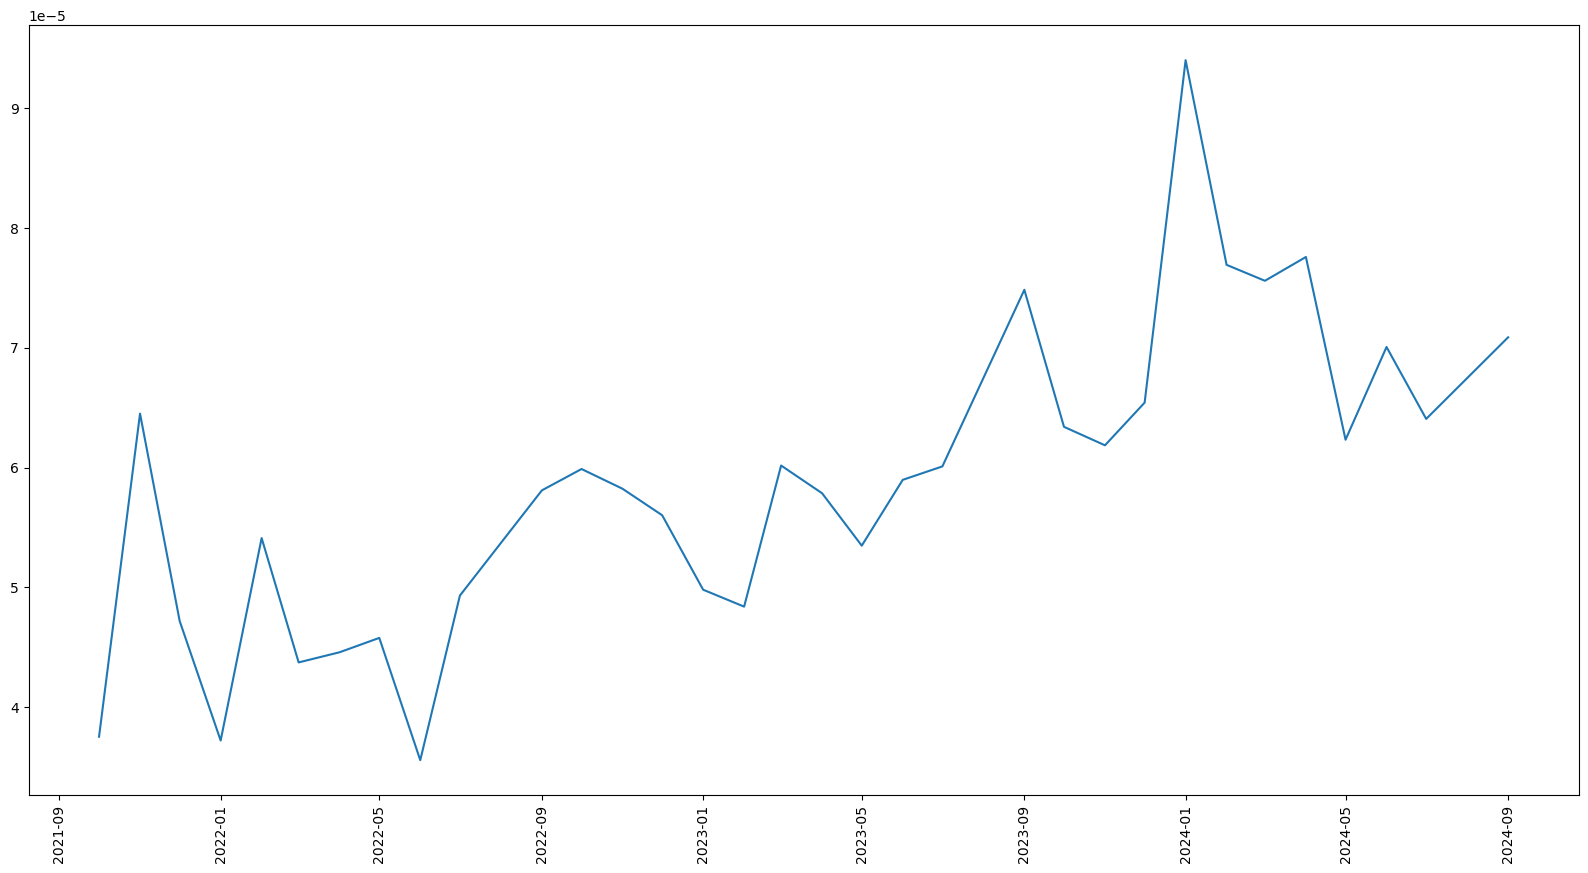

In [46]:
features_with_polarization_20['month_year'] = pd.to_datetime(features_with_polarization_20['date']).dt.to_period('M')

# group by monhth, sum polarizing
features_with_polarization_20_grouped = features_with_polarization_20.groupby('month_year').agg({'polarizing':'sum', 'speech_length':'sum'}).reset_index()

features_with_polarization_20_grouped['polarizing_frequenncy'] = features_with_polarization_20_grouped['polarizing']/features_with_polarization_20_grouped['speech_length']

features_with_polarization_20_grouped['month_year'] = features_with_polarization_20_grouped['month_year'].dt.to_timestamp()
# plot
plt.figure(figsize=(20,10))
plt.plot(features_with_polarization_20_grouped['month_year'], features_with_polarization_20_grouped['polarizing_frequenncy'])
plt.xticks(rotation=90)
plt.show()


# 5. Analysis by parties

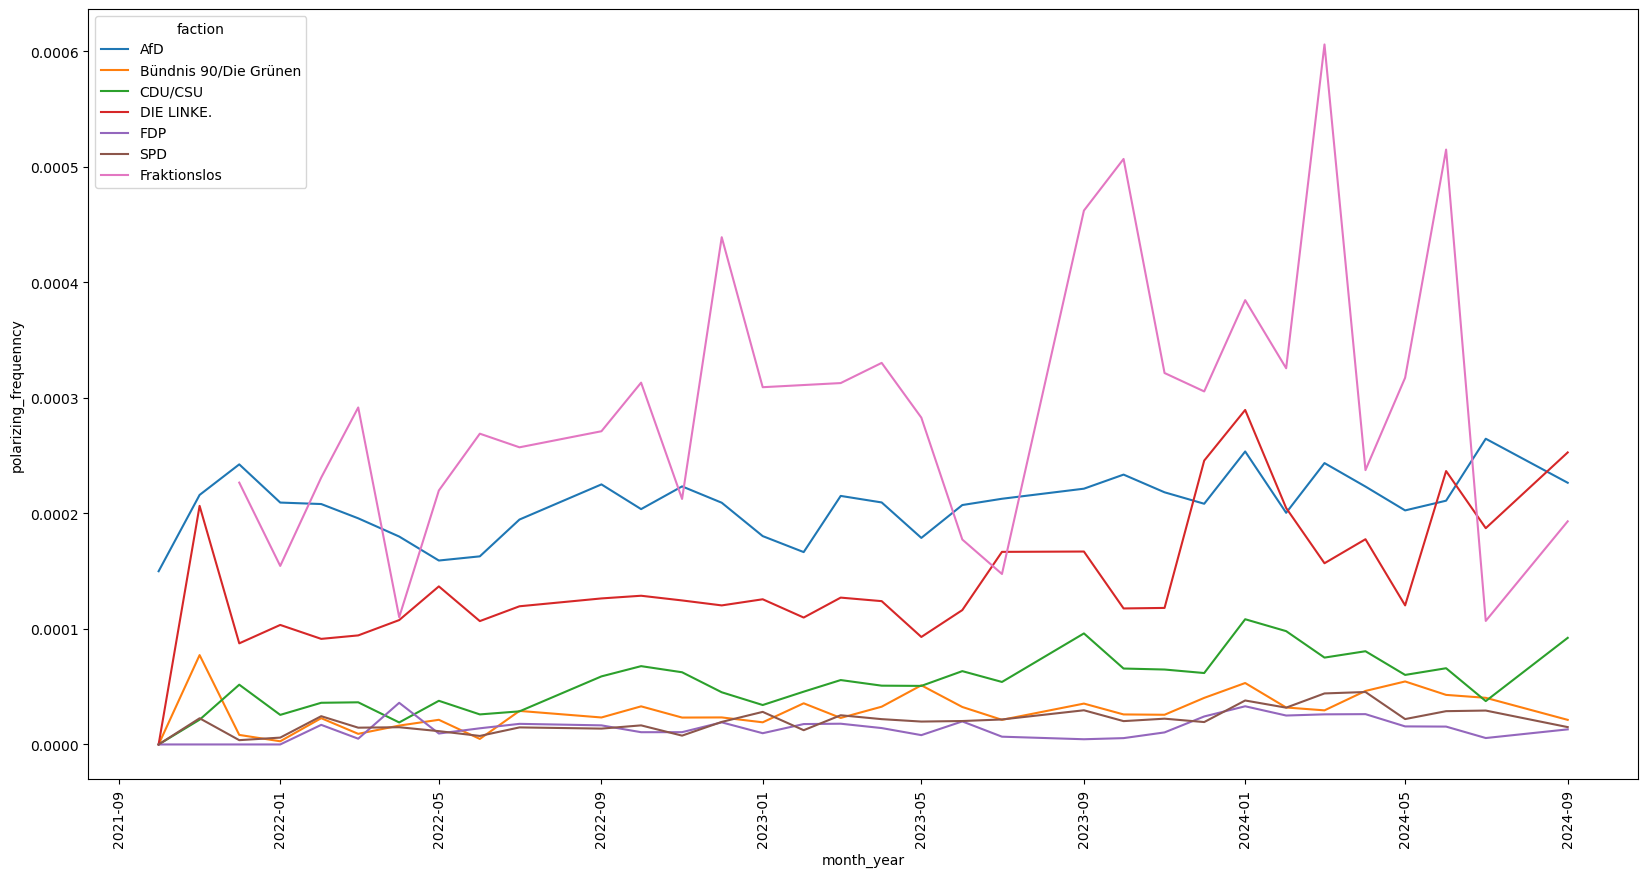

In [47]:
# group by faction, sum polarizinng, vizaulize
features_with_polarization_20_grouped_faction = features_with_polarization_20.groupby(['month_year', 'faction']).agg({'polarizing':'sum', 'speech_length':'sum'}).reset_index()

features_with_polarization_20_grouped_faction['polarizing_frequenncy'] = features_with_polarization_20_grouped_faction['polarizing']/features_with_polarization_20_grouped_faction['speech_length']

features_with_polarization_20_grouped_faction['month_year'] = features_with_polarization_20_grouped_faction['month_year'].dt.to_timestamp()

plt.figure(figsize=(20,10))
sns.lineplot(data=features_with_polarization_20_grouped_faction, x='month_year', y='polarizing_frequenncy', hue='faction')
plt.xticks(rotation=90)
plt.show()


# 6. Demographics

In [50]:
# group by gender, sum polarizing, vizaulize
features_with_polarization_20_gender = features_with_polarization_20.groupby('gender').agg({'polarizing':'sum', 'speech_length':'sum'}).reset_index()

features_with_polarization_20_gender['polarizing_frequency'] = features_with_polarization_20_gender['polarizing']/features_with_polarization_20_gender['speech_length']

features_with_polarization_20_gender

,gender,polarizing,speech_length,polarizing_frequency
0,männlich,3488,51542636,0.000068
1,weiblich,1161,24630399,0.000047
